In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the data from the csv file
senate_df = pd.read_csv('usa_data/senators.csv')
house_df = pd.read_csv('usa_data/representatives.csv')

In [2]:
print(len(senate_df))
print(len(house_df))

100
435


In [3]:
import json
# load the JSON string back into a dictionary
with open('usa_data/house_links.json', 'r') as f:
    house_links = json.loads(f.read())

with open('usa_data/senate_links.json', 'r') as f:
    senate_links = json.loads(f.read())

In [4]:
all_links = {**house_links, **senate_links}

In [15]:
print(len(house_links))

434


In [19]:
import networkx as nx
graph = nx.DiGraph(all_links)

# remove isolated nodes

# print the number of nodes and edges in the graph
print(len(graph.nodes()))
print(len(graph.edges()))

534
3026


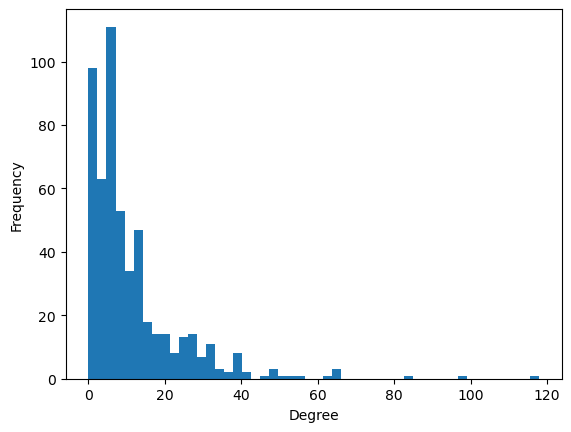

In [20]:
# make histograms of degree distributions
# find degree of each node
degrees = [val for (node, val) in graph.degree()]

# plot the distribution of degrees
plt.hist(degrees, bins=50)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()


In [21]:
# find the node with the highest degree
max_degree = 0
for n in graph.nodes():
    if graph.degree(n) > max_degree:
        max_degree = graph.degree(n)
        max_node = n

print(max_node, max_degree)

Nancy Pelosi 118


In [23]:
# extracts largest connected component
largest_cc = max(nx.weakly_connected_components(graph), key=len)
subgraph = graph.subgraph(largest_cc)

# print the number of nodes and edges in the graph
print(len(subgraph.nodes()))


452


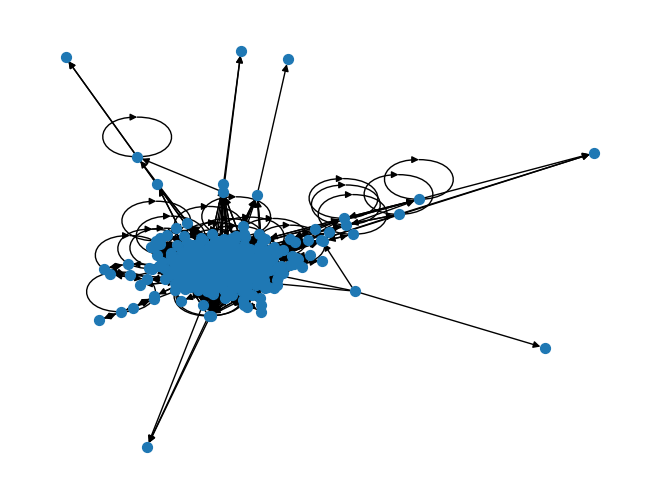

In [28]:
# draw the graph
nx.draw(subgraph,pos=nx.spring_layout(subgraph), node_size=50)